# Nombre: Luis Ricardo Tun Aguilar
# Carnet: 22003085


# Proyecto No. 1


## 1. Crear un entorno de anaconda con los paquetes que considere necesarios.


## Entorno creado con el comando

conda create --name proyecto_env python=3.11

## Las librerías necesarias fueron instaladas con los comandos

conda install matplotlib 

conda install seaborn 

conda install numpy 

conda install pandas 

conda install scikit-learn

## 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validación y pruebas(20 %).


In [35]:
# Importa las librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Define el directorio de los datos a trabajar
path_data = "/Users/luistun/Maestria/curso_ciencia_datos_python/proyecto_data/"

In [37]:
# Carga el archivo
datos = np.load(path_data + 'proyecto_training_data.npy')

In [38]:
# Visualiza los datos
datos

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [39]:
# Obtener la dimensión de datos
datos.shape

(1460, 6)

In [40]:
# Calcula el índice que representa el 80% de las filas
indice_80_por_ciento = int(0.8 * datos.shape[0])

In [41]:
# Divide los datos en conjuntos de entrenamiento y validación
set_de_entrenamiento = datos[:indice_80_por_ciento, :]
set_de_validacion = datos[indice_80_por_ciento:, :]

## 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):
    * media
    
    * valor máximo
    
    * valor mı́nimo
    
    * rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
    
    * desviación estándar

In [43]:
# Obteniendo el shape del set de entrenamiento
set_de_entrenamiento.shape

(1168, 6)

In [44]:
# Calcula la media de cada variable
medias_por_variable = np.nanmean(set_de_entrenamiento, axis=0)

In [45]:
# Visualizando medias por variable
print(f"La media de cada variable es: {medias_por_variable}")

La media de cada variable es: [1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]


In [46]:
# Calcula el máximo de cada variable
maximo_por_variable = np.nanmax(set_de_entrenamiento, axis=0)

In [47]:
# Visualizando máximos por variable
print(f"El máximo de cada variable es: {maximo_por_variable}")

El máximo de cada variable es: [7.550e+05 1.000e+01 3.228e+03 1.400e+01 2.010e+03 3.130e+02]


In [18]:
# Calcula el mínimo por variable
minimo_por_variable = np.nanmean(set_de_entrenamiento, axis=0)

In [48]:
# Visualizando mínimos por variable
print(f"El mínime de cada variable es: {minimo_por_variable}")

El mínime de cada variable es: [1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]


In [49]:
# Calcula el rango de cada variable
rango_por_variable = np.nanmax(set_de_entrenamiento, axis=0) - np.nanmin(set_de_entrenamiento, axis=0)

In [50]:
# Visualizando el rango (peak to peak) por variable
print(f"El rango (peak to peak) de cada variable es: {rango_por_variable}")

El rango (peak to peak) de cada variable es: [7.201e+05 9.000e+00 2.894e+03 1.200e+01 1.350e+02 2.920e+02]


In [51]:
# Calcula la desviación estándar de cada variable
desviacion_estandar_por_variable = np.nanstd(set_de_entrenamiento, axis=0)

In [52]:
# Visualizando la desviación estándar por variable
print(f"La desviación estándar de cada variable es: {desviacion_estandar_por_variable}")

La desviación estándar de cada variable es: [7.87819511e+04 1.37743519e+00 3.73620332e+02 1.60845172e+00
 2.99388821e+01 2.34659548e+01]


## 4. Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable.


In [55]:
set_de_entrenamiento.shape[1]

6

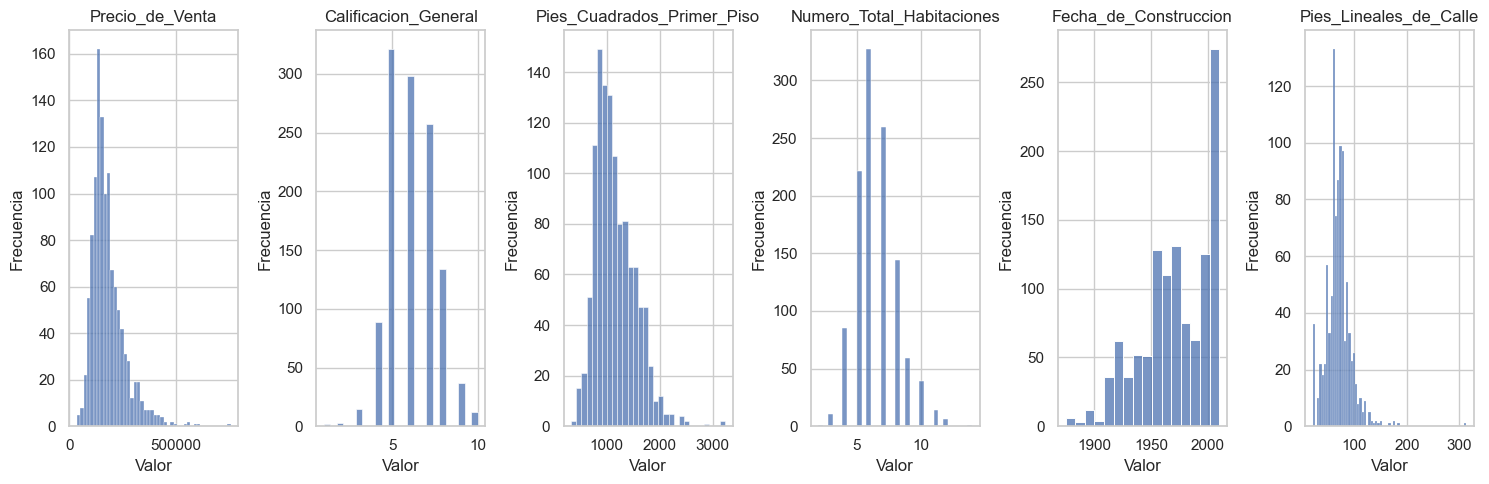

In [57]:
# Configura el estilo de las gráficas
sns.set(style="whitegrid")

# Crea subgráficas para cada variable
fig, axes = plt.subplots(nrows=1, ncols=set_de_entrenamiento.shape[1], figsize=(15, 5))

# Lista con nombre de cada variable
nombres_variables = ['Precio_de_Venta', 'Calificacion_General', 'Pies_Cuadrados_Primer_Piso', 'Numero_Total_Habitaciones', 'Fecha_de_Construccion', 'Pies_Lineales_de_Calle']

# Itera sobre cada columna (variable) del conjunto de entrenamiento
for columna, ax in enumerate(axes):
    variable_actual = set_de_entrenamiento[:, columna]
    
    # Utiliza histplot para crear un histograma de la variable actual
    sns.histplot(variable_actual, kde=False, ax=ax)
    ax.set(title=nombres_variables[columna], xlabel='Valor', ylabel='Frecuencia')

# Ajusta el diseño de las subgráficas
plt.tight_layout()

# Muestra la gráfica
plt.show()

## Para cada variable independiente x :

    * Calcular el coeficiente de correlación entre x y y.
    * Graficar x vs y(scatterplot) usando matplotlib.
    * Colocar el coeficiente de correlación y colocarlo como parte del tı́tulo de la gráfica.
    * Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables con más potencial predictivo es decir las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente.
    

In [58]:
# Separando la variable independiente y de las variables independientes
y = datos[:, 0]
variables_independientes = datos[:, 1:]

In [61]:
# Calcula el coeficiente de correlación entre cada variable independiente (x) y la variable dependiente (y)
coeficientes_correlacion = []
for i in range(variables_independientes.shape[1]):
    x = variables_independientes[:, i]
    
    # Filtrar NaNs de la variable independiente x
    indices_no_nan = ~np.isnan(x)
    x_no_nan = x[indices_no_nan]
    y_no_nan = y[indices_no_nan]
    
    # Calcular el coeficiente de correlación solo si hay valores no NaN
    if len(x_no_nan) > 0:
        coef_corr = np.corrcoef(x_no_nan, y_no_nan)[0, 1]
    else:
        coef_corr = np.nan
    
    coeficientes_correlacion.append(coef_corr)

In [63]:
# Muestra los coeficientes de correlación de cada variable
print(f"Los coeficientes de correlación de cada variable son: {coeficientes_correlacion}")

Los coeficientes de correlación de cada variable son: [0.7909816005838052, 0.6058521846919145, 0.5337231555820281, 0.5228973328794968, 0.351799096570678]


In [71]:
# Encuentra los índices de las dos variables con mayor correlación
variables_top2_indices = np.argsort(np.abs(coeficientes_correlacion))[::-1][:2]

In [72]:
variables_top2_indices[0] + 1

1

In [73]:
# Muestra las dos variables con mayor correlación
variables_seleccionadas = [nombres_variables[variables_top2_indices[0]+1], nombres_variables[variables_top2_indices[1]+1]]
print(f"Las 2 variables con mayor correlación son: {variables_seleccionadas}")

Las 2 variables con mayor correlación son: ['Calificacion_General', 'Pies_Cuadrados_Primer_Piso']


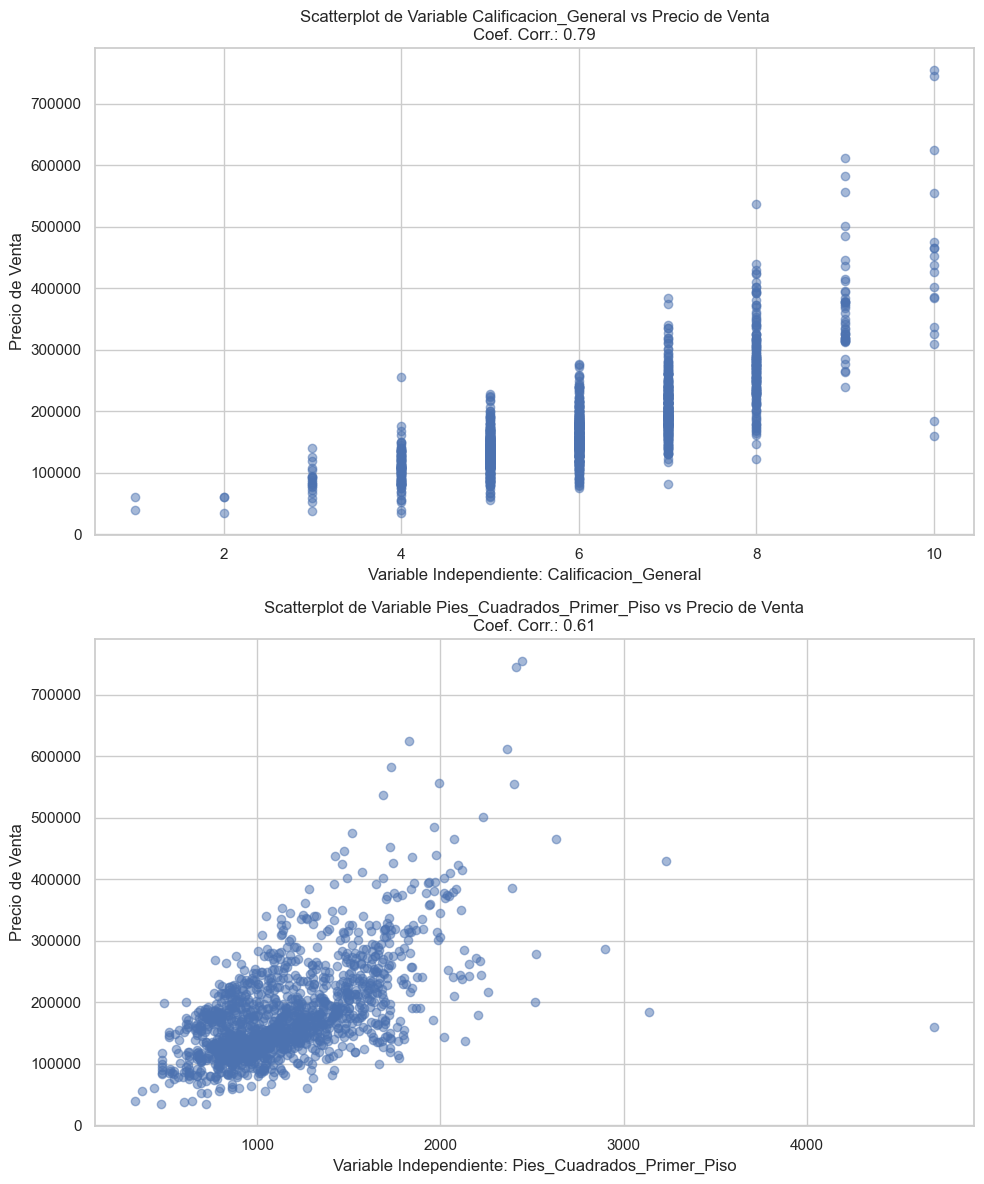

In [78]:
# Grafica x vs y (scatterplot) para las dos variables con mayor correlación
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
for i, idx in enumerate(variables_top2_indices):
    x = variables_independientes[:, idx]
    coef_corr = coeficientes_correlacion[idx]
    
    axs[i].scatter(x, y, alpha=0.5)
    axs[i].set_xlabel(f'Variable Independiente: {variables_seleccionadas[i]}')
    axs[i].set_ylabel('Precio de Venta')
    axs[i].set_title(f'Scatterplot de Variable {variables_seleccionadas[i]} vs Precio de Venta\nCoef. Corr.: {coef_corr:.2f}')

plt.tight_layout()
plt.show()

In [82]:
# Imprime las dos variables con mayor correlación y el coeficiente de correlación
print("Las dos variables con mayor correlación son:")
for idx in variables_top2_indices:
    print(f"Variable Independiente: {variables_seleccionadas[idx]}, Coef. Corr.: {coeficientes_correlacion[idx]:.2f}")

Las dos variables con mayor correlación son:
Variable Independiente: Calificacion_General, Coef. Corr.: 0.79
Variable Independiente: Pies_Cuadrados_Primer_Piso, Coef. Corr.: 0.61


## 6. Crear una función para entrenar un modelo de regresión lineal de una variable y = β0 + β1 ∗ x. La función recibe como argumentos:
    6.1 Vector con la variable independiente x,
    6.2 Vector con la variable dependiente y,
    6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
    6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremos
    imprimir a través de print: el número de iteración, el error del modelo en esa itera-
    ción, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones:
    10,20,30,40,50.
    6.5 escalar α(learning rate): es usado como parte de la expresión matemática para actualizar
    en cada iteración los parámetros del modelo.
    